----------------------------------------------------------------
## **<a class="anchor" id="link0">Problem 2: Player Categorization</a> 🎽**
----------------------------------------------------------------
**Date:** April 30, 2022</br>
**By:** Geoffrey Price</br>
</br>
In this notebook, I use cleaned data originally scraped from the AUDL website to assess the characteristics of different categories of players in the AUDL. I will use KNN and other methods to assign player positions to players who don't have a category on their website bio. 

**Problem Statement**
*How do players stats differ across different playing positions? Is there a set of stats that can be used to assign a position to players based on their performance?*</br>
The AUDL website places players into one of four categories:
- *Cutter:* A player who handles the disc less often and instead makes vertical and horizontal **cuts** on the field to help open up space or score
- *Defender:* A player who's skills are more oriented towards shutting down other teams' abilites to score
- *Handler:* A player who is skilled at identifying open players and throwing the disc to them.
- *Hybrid:* A player who has a combination of cutter and handler skills and is able to play in either position.

### Table of Contents
1. [Data Import and Overview 🧮](#link1)
2. [Univariate Analysis 1️⃣](#link2)
    - a. [Total Game Counts 🎮](#link2a)
    - b. [Goals Scored 🥅](#link2b)
    - c. [Univariate Analysis Summary](#link2c)
3. [Multivariate Analysis ✌➕](#link3)
    - a. [Correlation 📈](#link3a)
    - b. [Scores by Season 📅](#link3b)
    - c. [Margin of Victory 🤏](#link3c)
    - d. [Scoring Factor ➕➖](#link3d)
    - e. [Multivariate Analysis Summary](#link3e)
4. [Hypothesis Testing 👨🏿‍🔬](#link4)
5. [Conclusions 🔚](#link5)
    - a. [Data Limitations 📦](#link5a)
6. [Resources 🕸](#linkR)

In [13]:
# IMPORTS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from icecream import ic

%matplotlib inline

-------------------------------------------------------------
# <a class="anchor" id="link0">Data Import and Overview</a> 🧮
-------------------------------------------------------------

In [6]:
# Data Import
DATA_PATH = ".\\DATA\\postproc\\players.csv"
df: pd.DataFrame = pd.read_csv(DATA_PATH,)
df.head()

,player,games,points_played,off_possessions,scores,assists,goals,blocks,plus_minus,completions,...,hockey_assists,throwaways,stalls,drops,callahans,pulls,off_points_played,def_points_played,minutes_played,position
0,Cameron Brock,122,2631,2838,756,240,516,49,585,1644,...,146,177,0,43,0,6,2204,427,2123,Cutter
1,Cameron Harris,108,2361,2734,610,337,273,115,488,2035,...,180,198,1,39,0,132,1756,605,2117,Hybrid
2,Ben Jagt,79,1995,2194,525,254,271,115,485,1231,...,121,122,2,33,1,114,1202,793,2000,Hybrid
3,Jonathan Helton,110,2550,2288,609,362,247,147,458,2312,...,152,255,3,43,0,452,1738,812,1886,Hybrid
4,Keenan Plew,115,2429,2656,644,358,286,32,456,3584,...,213,179,1,41,1,5,2076,353,2022,Hybrid


In [8]:
# Dtypes and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player             2558 non-null   object 
 1   games              2558 non-null   int64  
 2   points_played      2558 non-null   int64  
 3   off_possessions    2558 non-null   int64  
 4   scores             2558 non-null   int64  
 5   assists            2558 non-null   int64  
 6   goals              2558 non-null   int64  
 7   blocks             2558 non-null   int64  
 8   plus_minus         2558 non-null   int64  
 9   completions        2558 non-null   int64  
 10  completion_pct     1317 non-null   float64
 11  total_yards        2558 non-null   int64  
 12  throwing_yards     2558 non-null   int64  
 13  receiving_yards    2558 non-null   int64  
 14  off_efficiency     1574 non-null   float64
 15  hockey_assists     2558 non-null   int64  
 16  throwaways         2558 

### Summary:
- All category dtypes are correct. The only two 'object' categories are the player names and positions.
- `completion_pct`, `off_efficiency`, and `position` are the only three columns with null data.

----------------
# <a class="anchor" id="link2">Univariate Analysis 1️⃣</a>
----------------

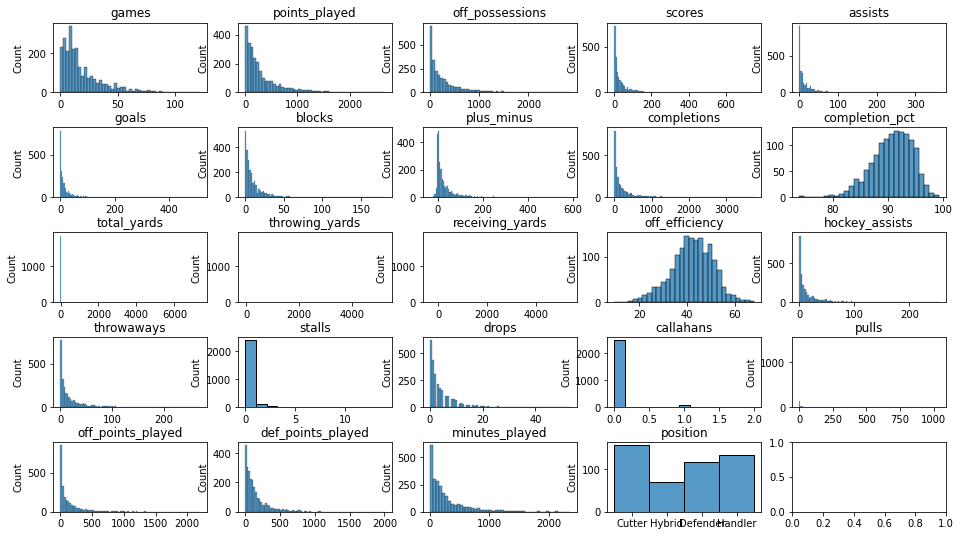

In [28]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(16, 9))
plt.subplots_adjust(hspace=0.5)

for col, ax in zip(df.columns.drop('player'), ax.ravel()):
    sns.histplot(data=df, x=col, ax=ax)

    # chart formatting
    ax.set_title(col)
    # ax.get_legend().remove()
    ax.set_xlabel("")